Homework 5

Caleb Malinowski

RIN: 662052559

Question 1

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# load data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# standardize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# model params (CNN)
model = models.Sequential([
    layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
# train
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2873 - loss: 1.9110 - val_accuracy: 0.4677 - val_loss: 1.4751
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4990 - loss: 1.4028 - val_accuracy: 0.5463 - val_loss: 1.2735
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5660 - loss: 1.2166 - val_accuracy: 0.5672 - val_loss: 1.2139
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6030 - loss: 1.1209 - val_accuracy: 0.5772 - val_loss: 1.1974
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6337 - loss: 1.0373 - val_accuracy: 0.6222 - val_loss: 1.0624
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6578 - loss: 0.9760 - val_accuracy: 0.6418 - val_loss: 1.0166
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6723 - loss: 0.9400 - val_accuracy: 0.6467 - val_loss: 0.9961
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6819 - loss: 0.8921 - val_accuracy: 0

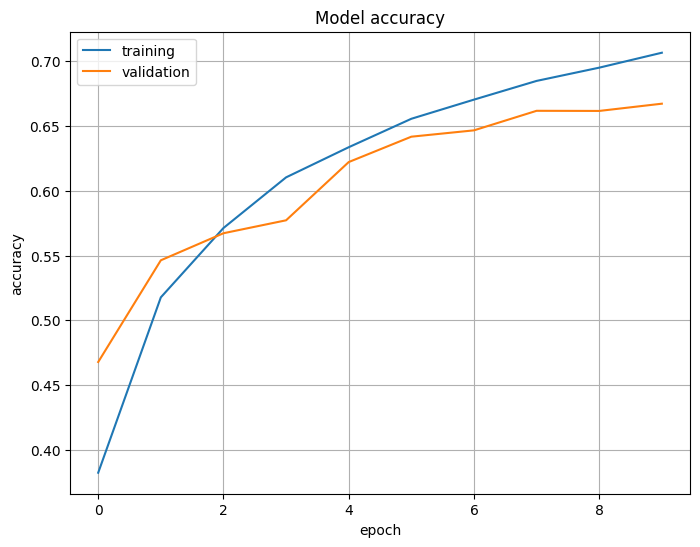

In [5]:
# plotting
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

Question 2

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# load data
data = load_breast_cancer()

# features and label
features = ['worst compactness', 'worst concavity', 'worst area']
X = data.data[:, [list(data.feature_names).index(f) for f in features]]
y = data.target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# linear kernal support vector machine classifiers
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

In [8]:
# radial basis function kernal (C=2)
svm_rbf = SVC(kernel='rbf', C=2, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

In [9]:
# results
print(f"Accuracy with linear kernel: {acc_linear*100:.2f}%")
print(f"Accuracy with radial basis function kernel: {acc_rbf*100:.2f}%")

Accuracy with linear kernel: 96.49%
Accuracy with radial basis function kernel: 95.32%
